In [1]:
import Pkg
Pkg.activate("/home/jovyan/CommonModule")

Activating environment at `~/CommonModule/Project.toml`


In [2]:
using Images
using TestImages
using ImageMagick
using ImageDraw
using CSV
using DataFrames
using ColorTypes

In [3]:
@doc Images.load

  * `load(filename)` loads the contents of a formatted file, trying to infer

the format from `filename` and/or magic bytes in the file.

  * `load(strm)` loads from an `IOStream` or similar object. In this case,

there is no filename extension, so we rely on the magic bytes for format identification.

  * `load(File(format"PNG", filename))` specifies the format directly, and bypasses inference.
  * `load(Stream(format"PNG", io))` specifies the format directly, and bypasses inference.
  * `load(f; options...)` passes keyword arguments on to the loader.


In [4]:
train_df = CSV.File("/home/jovyan/data/understanding_cloud_organization/train.csv") |> DataFrame!
;

In [5]:
names(train_df)

2-element Array{Symbol,1}:
 :Image_Label  
 :EncodedPixels

In [6]:
unique([r[2] for r in (@. split(train_df.Image_Label, "_"))])

4-element Array{SubString{String},1}:
 "Fish"  
 "Flower"
 "Gravel"
 "Sugar" 

In [7]:
function draw_area_point!(p, l, img, label)
    for i in p:p+l
        old_px = img[i]
        new_px = (
        "Fish"   == label ? RGBA(old_px.r, old_px.g, 1/2+old_px.b/2, 1.0) :
        "Flower" == label ? RGBA(old_px.r, 1/2+old_px.g/2, old_px.b, 1.0) :
        "Sugar"  == label ? RGBA(old_px.r/2+1/2, 1/2+old_px.g/2, old_px.b, 1.0) :
        "Gravel" == label ? RGBA(old_px.r/2+1/2, 1/2+old_px.g/2, 1/2+old_px.b/2, 1.0) :
            error("Unknown label $label")
        )
        img[i] = new_px
    end
end

draw_area_point! (generic function with 1 method)

In [8]:
function draw_area!(img, area_encoded, label)
    for (p, l) in zip(area_encoded[1:2:end], area_encoded[2:2:end])
        draw_area_point!(p, l, img, label)
    end
    return img
end

draw_area! (generic function with 1 method)

In [9]:
function extract_area(df, case, label)
    idx = @. startswith(df.Image_Label, case) & endswith(df.Image_Label, label)
    matching_df = dropmissing(df[idx, :])
    
    if nrow(matching_df) > 0
        area_string = first(matching_df.EncodedPixels)
        return [parse(Int, n) for n in split(area_string, " ")]
    end
end

extract_area (generic function with 1 method)

In [10]:
function show_image_selection(case, df = train_df)
    img = [coloralpha(pixel) for pixel in Images.load("/home/jovyan/data/understanding_cloud_organization/train_images/$case.jpg")]
    
    for label in ["Fish", "Flower", "Gravel", "Sugar" ]
        area_encoded = extract_area(df, case, label)
        if area_encoded != nothing
            img = draw_area!(img, area_encoded, label)
        end
    end
    
    return img
end

show_image_selection (generic function with 2 methods)

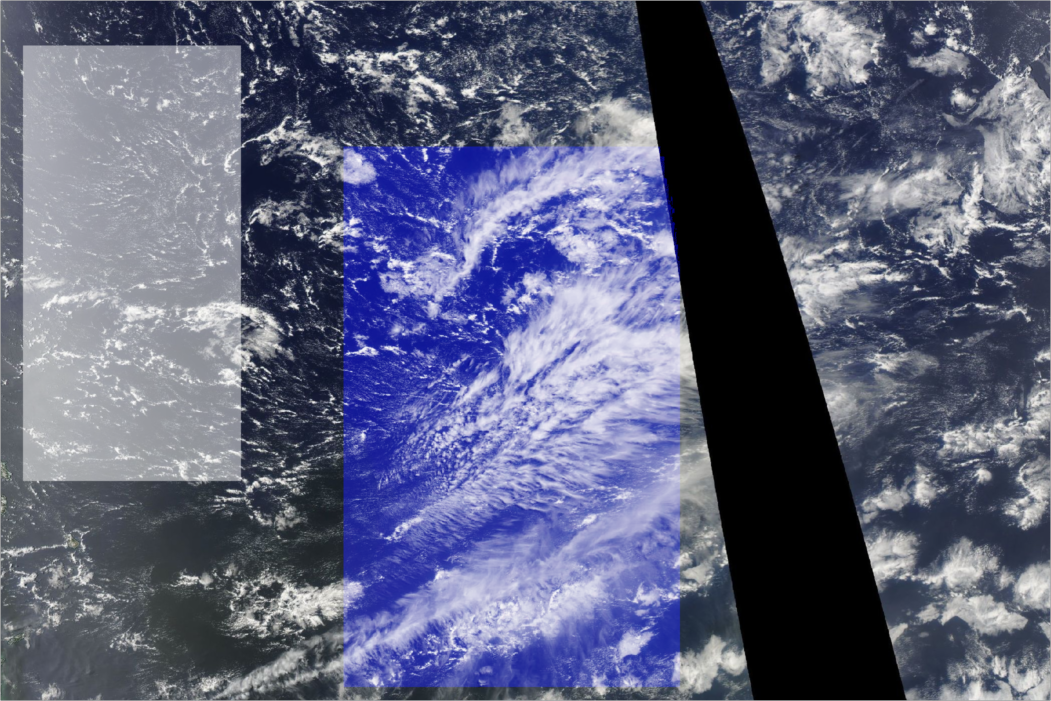

In [11]:
show_image_selection("04d5fe8")